In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
%matplotlib inline
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore


/home/maria/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_pytorch.npy')
V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy')


In [11]:
print(U.shape)
print(V.shape)

(10103, 150)
(5880, 150)


In [12]:
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp).T
print(X.shape)

/home/maria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


(10103, 5880)


(565,)
0.05321968127622912 0.0022552714921794228


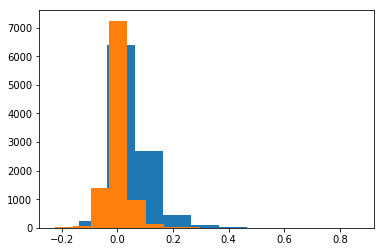

In [28]:
neurons=np.nonzero(U[:,4])
print(neurons[0].shape)
ensemble_X=X[neurons,:][0]
#print(ensemble_X.shape)
#print(neurons)
#for j in range(0,10):
    #plt.plot(ensemble_X[j,0:200])
    #plt.show()

corr_lst=[]
corr_lst_orig=[]
for i in range(0,100):
    for j in range(0,100):
        if j!=i:
            #print(j,i)
            corr_lst.append(np.corrcoef(ensemble_X[j,:],ensemble_X[i,:])[0,1])
            corr_lst_orig.append(np.corrcoef(X[j,:],X[i,:])[0,1])
#print(corr_lst)
plt.hist(corr_lst)
plt.hist(corr_lst_orig)
print(np.mean(corr_lst),np.mean(corr_lst_orig))

In [33]:
from scipy import stats
stats.ttest_ind(corr_lst,corr_lst_orig)
#print(p)
#print(t)

Ttest_indResult(statistic=63.938759893877524, pvalue=0.0)

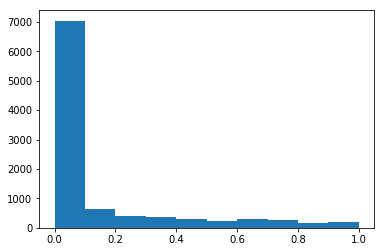

9884
9900


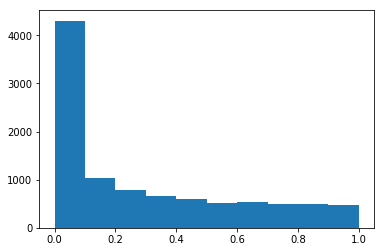

In [58]:
from scipy.stats.stats import pearsonr
p_lst=[]
p_lst_orig=[]
for i in range(0,100):
    for j in range(0,100):
        if j!=i:
            #print(j,i)
            corr,p=pearsonr(ensemble_X[j,:],ensemble_X[i,:])
            p_lst.append(p)
            corr2,p2=pearsonr(X[j,:],X[i,:])
            p_lst_orig.append(p2)
#print(corr_lst)
#print(corr_lst_orig)
plt.hist(p_lst)
plt.show()
plt.hist(p_lst_orig)
p_lst_=np.array(p_lst)
p_lst_[p_lst_>0.05]=0
print(np.nonzero(p_lst)[0].shape[0])

p_lst_orig_=np.array(p_lst_orig)
p_lst_orig_[p_lst_orig_>0.05]=0
print(np.nonzero(p_lst_orig)[0].shape[0])


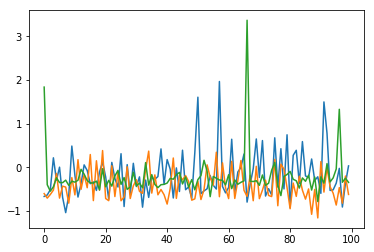

In [18]:
for j in range(0,3):
    plt.plot(ensemble_X[j,0:100])

In [65]:
import statsmodels.stats.multitest as smm

res,_,_,_=smm.multipletests(p_lst_orig, alpha=0.05, method='b')
print(sum(res))

854
